In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('heart.csv')    #to read the file
print(data.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [3]:
# Encode Categorical Features
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
encoders = {col: LabelEncoder() for col in categorical_features}
for col in categorical_features:
    data[col] = encoders[col].fit_transform(data[col])

In [4]:
# Scale Numerical Features
scaler = StandardScaler()
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [5]:
# Split the Dataset
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train the Naive Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [7]:
# Predictions
y_pred = model.predict(X_test)
print(y_pred)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC
print(y_prob)

[0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1
 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1]
[1.10143630e-04 8.69275487e-01 9.99960300e-01 9.99840825e-01
 4.35771494e-03 8.78257678e-01 9.61337664e-01 1.79301548e-02
 6.40767322e-01 9.99996715e-01 1.64056404e-01 4.80022556e-02
 4.21135403e-01 3.10187058e-03 9.93765026e-01 9.46550699e-01
 2.63030221e-04 9.99542583e-01 2.23381748e-01 7.72906109e-01
 8.77206290e-01 6.01543899e-01 3.23946550e-04 7.57915487e-01
 9.99942591e-01 9.71660676e-01 2.12324323e-03 9.99998941e-01
 6.72337447e-04 1.93153527e-04 1.95727423e-01 2.15834467e-03
 9.97900617e-01 9.97122441e-01 9.99999999e-01 9.94048593e-01
 9.97817204e-01 3.71527115e-04 9.90752096e-01 9.67056510e-01
 9.63051065e-01 

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.842391304347826


In [9]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Precision: 0.8823529411764706
Recall: 0.8411214953271028
F1 Score: 0.861244019138756


In [10]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[65 12]
 [17 90]]


In [11]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82        77
           1       0.88      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



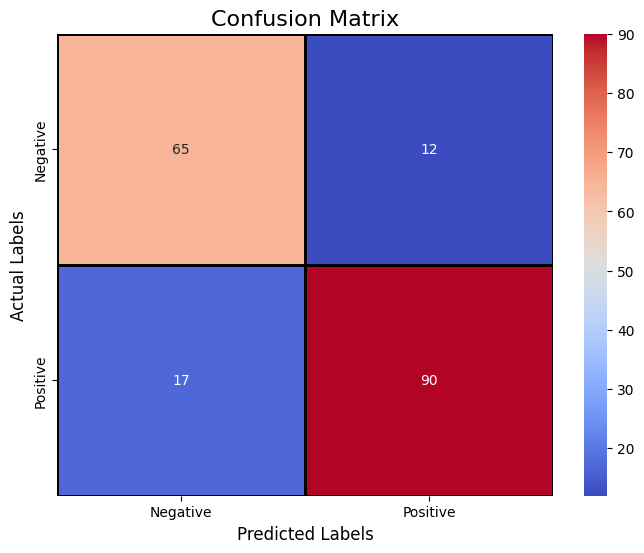

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assume y_test and y_pred are already defined
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,          # Display the numbers inside the boxes
    fmt='d',             # Integer format for the numbers
    cmap='coolwarm',     # Color palette for the heatmap
    linewidths=1,        # Add gridlines between cells
    linecolor='black',   # Gridline color
    xticklabels=["Negative", "Positive"],  # Custom labels for columns
    yticklabels=["Negative", "Positive"]   # Custom labels for rows
)

# Add titles and labels
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("Actual Labels", fontsize=12)
plt.show()
